#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto Módulo 2 Limpieza y preprocesado de datos

## Introducción

En la vida laboral de un científico de datos, la tarea más importante es realizar un buen análisis. Sin un entendimiento del problema, resultará difícil aplicar un buen modelo para su resolución. Por ello, ahora que comprendiste las técnicas revisadas a lo largo de este módulo, serás capaz de aplicar el tratamiento necesario de un conjunto de datos para su explotación.

## Demo

Este documento te servirá como inspiración para crear el tuyo: https://drive.google.com/file/d/1LKiMVyepbdTBK_Fs_9e6-y2ybB0Kem-Y/view?usp=sharing

## ¿Qué construirás?

Un análisis sobre un conjunto de datos para su posterior modelado. Este proyecto se dividirá en 4 secciones:

*   Análisis Exploratorio
*   Limpieza de datos
*   Procesamiento de datos
*   Reducción de dimensiones

## Criterios de evaluación

* Análisis Exploratorio: Calidad del análisis, entendimiento de las variables y estudio de las correlaciones con el objetivo. (25pts)
  - Excelente: Comprende la multicolinealidad entre las variables y señala gráficamente los valores atípicos en las distribuciones.
  - Suficiente: Comprende la relevancia de las variables e identifica las variables más significativas y cuales tienen mayor relación con el objetivo.

*   Limpieza de datos: Eliminación de faltantes, duplicados y atípicos de manera correcta, eligiendo el mejor modo para imputar valores faltantes. (25pts)

  - Excelente: Elimina los valores atí­picos y los imputa eligiendo el mejor modo para imputar valores faltantes.
  - Suficiente: Elimina las variables que no cumplen con el criterio de completitud y se imputan los valores restantes sin justificar o comprar el método de imputación.


*   Procesamiento de datos: Correcto uso de transformadores, justificando el porque se eligió uno sobre algún otro. (25pts)

  - Excelente: Transforma las variables de acuerdo a su naturaleza utilizando distintos métodos para escalar dependiendo de los valores de cada variable.
  - Transforma las variables categóricas y variables continuas.

*   Reducción de dimensiones: Selección de la mejor técnica para reducir las dimensiones, además de justificar el porque se esta reduciendo a cierto número sobre cualquier otro. (25pts)

  - Excelente: Elige el óptimo número de dimensiones de acuerdo a varias técnicas, justificando el porque se eligió el número de dimensiones final.
  - Suficiente: Reduce el conjunto de datos propuesto para una correcta reducción de nuestro set de datos.


## Objetivos

El participante:

* Realizará un correcto análisis y tratamiento de datos, el cuál le permita preparar y limpiar los datos de la forma más adecuada para utilizarlos posteriormente en un modelo.
* Comprenderá la relevacia de las variables e identificará las variables más significativas que tienen mayor relación con el objetivo.
* Comprenderá la multicolinealidad entre las variables y señalará gráficamente los valores atípicos en las distribuciones.
* Eliminará valores faltantes, duplicados y atípicos de manera correcta, usando el modo más adecuado para su objetivo.
* Usará de forma adecuada los transformadores utilizando distintos métodos para escalar en función de los valores de cada variable.
* Hará una correcta reducción del set de datos y elegirá el número óptimo de dimensiones mediante diversas técnicas.

¡Es momento de ponerte a prueba y descubrir todo lo que eres capaz!

Comienza por analizar cada uno de los apartados que te solicitamos para este proyecto y trata de usar todas las herramientas que aprendiste a lo largo del módulo. Recuerda que el detalle que pongas en cada proceso será tomado en cuenta en tu evaluación, revisa los criterios en la sección de tareas de Teams.

¡Te desemos éxito!

## Conjunto de datos para analizar.
Se tiene información de Lending Club, empresa estadounidense de préstamos con sede en San Francisco, California. En dicha compañía, los prestatarios pueden acceder fácilmente a préstamos con tasas de interés bajas.
El dataset contiene datos de todos los préstamos emitidos durante el periodo 2007-2015, con el estado actual del préstamo (actual, cancelado, completamente pagado) y la información de pago más reciente.

Las características adicionales incluyen puntajes de crédito, número de consultas financieras y cobros, entre otros.

Puedes descargar la información al hacer clic en el siguiente enlace:https://drive.google.com/file/d/1oxjXn7PkuqeSdQz5dOMXZOJfhJoBlX3T/view?usp=sharing

¡Comencemos!

In [ ]:
#Importa las librerías que vayas a usar para tu proyecto, no olvides importar pandas.

In [ ]:
#El primer paso es descargar el archivo, guardarlo en drive y finalmente leerlo con pd.read_csv.

In [ ]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  functools import reduce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.options.display.max_columns = None

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Proyecto Modulo 2/dataset_Proyecto_M2.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def infoplus(df, info='default'):

    registro = []
    colmax80 = []
    colmin80 = []
    for col in list(df.columns):
        var = []
        var.append(col)
        var.append(str(df[col].dtypes))
        var.append(df[col].count())
        var.append(df.shape[0]-df[col].count())
        var.append(round((1 - ((df.shape[0]-df[col].count()) / df.shape[0])) * 100,4))
        var.append(len(df[col].unique()))
        registro.append(var)
    dftotal = pd.DataFrame(registro, columns=['columna','tipo','total','faltantes','pct','unico'])
    dftotal = dftotal.sort_values(by = 'pct', ascending = False)

    if info == 'default':
        return dftotal
    else:
        print(f'***** El porcentaje de completitud del set de datos es: \033[1m{(df.count().sum()/df.size)*100:.1f}\033[0m%')
        return dftotal

In [ ]:
# Outliers
def outlierIQR(df,cols):
    results=pd.DataFrame()
    data_iqr=df.copy()
    data_per=df.copy()
    total=[]
    total_per=[]
    total_z=[]
    indices_=[]
    k=1.5

    for col in cols:
        #IQR
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        INF=Q1-k*(IQR)
        SUP=Q3+k*(IQR)


        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        total.append(n_outliers)
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
        #data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)

        #Percentiles
        INF_pe=np.percentile(df[col].dropna(),5)

        SUP_pe=np.percentile(df[col].dropna(),95)
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        total_per.append(n_outliers_per)
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        #data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)

        #MEAN CHANGE

        #Se obtienen todos los percentiles además del máximo
        perc_100 = [x / 100 for x in range(100)]
        dist = df[col].describe(perc_100).iloc[4:]
        #print(dist)
        #Tenemos el cambio entre percentiles
        change_dist = df[col].describe(perc_100).iloc[4:].diff()
        #print(change_dist)
        #Obtenemos el cambio promedio entre percentiles
        mean_change = df[col].describe(
            perc_100).iloc[4:].diff().mean()
        #Si el cambio entre el percentil 99 y el máximo es mayor a el cambio promedio entonces:
        if change_dist["max"] > mean_change:
            #La banda superior será el máximo menos el cambio promedio
            ub = dist["max"] - mean_change
            #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
            if ub < dist["99%"]:
                ub = dist["99%"]
        else:
        #9Si el cambio entre el percentil 9 y el máximo es menor o igual a el cambio promedio entonces se toma el percentil 99
            ub = dist["max"]

        if change_dist["1%"] > mean_change:
            lb = dist["0%"] + mean_change
            if lb > dist["1%"]:
                lb = dist["1%"]
        else:
            lb = dist["0%"]
        n_total_z=df[(df[col] < lb) | (df[col] > ub)].shape[0]
        total_z.append(n_total_z)
        indices_z=list(df[(df[col] < lb) | (df[col] > ub)].index)

        indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))

    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    results["n_outliers_Mean_Change"]=total_z
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["n_outliers_Mean_Change_%"]=round((results["n_outliers_Mean_Change"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil',
       'n_outliers_Mean_Change', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
       'n_outliers_Mean_Change_%',  'total_outliers', '%_outliers','indices']]
    return results

def aux_outliers(a,b,c):
    a=set(a)
    b=set(b)
    c=set(c)

    a_=a.intersection(b)

    b_=b.intersection(c)

    c_=a.intersection(c)

    outliers_index=list(set(list(a_)+list(b_)+list(c_)))
    return outliers_index

In [ ]:
def eliminarOUTLIERS(cols):

    reg1 = df.shape[0]
    print(f'Total registros antes de eliminar Outliers: {reg1}')

    dfensamble = pd.melt(df[cols])
    fig, ax = plt.subplots(figsize = (27, 9))
    sns.boxplot(x='variable', y='value', data=dfensamble).set(title='Columnas antes de eliminar Ouliers')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


    indices=list(outliers["indices"].values)
    indices=list(set(reduce(lambda x,y: x+y, indices)))

    dfdrop = df[~df.index.isin(indices)].reset_index(drop=True)

    reg2 = dfdrop.shape[0]
    print(f'Total registros despues de eliminar Outliers: {reg2}\n')

    dfensamble = pd.melt(dfdrop[cols])
    fig, ax = plt.subplots(figsize = (27, 9))
    sns.boxplot(x='variable', y='value', data=dfensamble).set(title='Columnas despues de eliminar Ouliers')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

    print('')

    etiquetas = 'Reg. sin Outliers', 'Reg. con Outliers'
    datos = [reg2,reg1]
    titulo = 'Relacion Outliers eliminados'
    fig, ax = plt.subplots()
    ax.pie(datos, labels=etiquetas, autopct='%1.1f%%')
    plt.title(titulo)
    plt.show()

    return dfdrop

In [ ]:
# Imputamos
def fnImputar(columnas, estrategia):
    imp = SimpleImputer(missing_values=np.nan, strategy=estrategia)
    imp.fit(df[columnas])
    df[columnas]=imp.transform(df[columnas])
    print(f'***** Imputacion finalizada, {len(columnas)} columnas, criterio usado: {estrategia}')

In [ ]:
# Renombramos columnas
def rename_cols(df,cols,prefix):
    new_feats=[prefix+col for col in cols]
    df=df.rename(columns=dict(zip(cols,new_feats)))
    return df

## Parte 1
Dado el _dataset_:

* Identifica el tipo de datos de cada variable y verifica la completitud.
* Determina las variables que son continuas, discretas y la variable objetivo.

> Puedes contar los valores dentro de una variable y utilizar las funciones que desees para cumplir estos objetivos; mientras más completo sea el EDA, mejor puntaje obtendrás.



In [ ]:
dataset = []

In [ ]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Identifica el tipo de datos de cada variable y verifica la completitud.
# Información sobre los tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [ ]:
df.shape

(887379, 74)

Tenemos 887.379 registros con 74 columnas

In [ ]:
# Se verifica si hay filas duplicadas
print("Número de filas duplicadas:", df.duplicated().sum())
print("\n")

Número de filas duplicadas: 0




No se observan filas duplicadas

In [ ]:
if df.isnull().values.any():
    print('***** Los datos NO estan completos')
else:
    print('***** Los datos estan completos')

***** Los datos NO estan completos


In [ ]:
completitud = infoplus(df,'completitud')

***** El porcentaje de completitud del set de datos es: 72.6%


In [ ]:
max80 = completitud[completitud['pct']>=80]
colmax80 = list(max80['columna'].values)

In [ ]:
print(f'***** El Dataframe resultante de la completitud contiene \033[1m{max80.shape[0]}\033[0m columnas')

***** El Dataframe resultante de la completitud contiene 52 columnas


In [ ]:
max80

,columna,tipo,total,faltantes,pct,unico
0,id,int64,887379,0,100.0000,887379
1,member_id,int64,887379,0,100.0000,887379
2,loan_amnt,float64,887379,0,100.0000,1372
3,funded_amnt,float64,887379,0,100.0000,1372
4,funded_amnt_inv,float64,887379,0,100.0000,9856
5,term,object,887379,0,100.0000,2
6,int_rate,float64,887379,0,100.0000,542
7,installment,float64,887379,0,100.0000,68711
8,grade,object,887379,0,100.0000,7
9,sub_grade,object,887379,0,100.0000,35


In [ ]:
# Vemos las variables con una completitud menor al 80%
min80 = completitud[completitud['pct'] < 80]
colmin80 = list(min80['columna'].values)

In [ ]:
min80

,columna,tipo,total,faltantes,pct,unico
47,next_pymnt_d,object,634408,252971,71.4923,101
28,mths_since_last_delinq,float64,433067,454312,48.8029,156
50,mths_since_last_major_derog,float64,221703,665676,24.9840,169
29,mths_since_last_record,float64,137053,750326,15.4447,124
19,desc,object,126026,761353,14.2020,124469
60,open_il_6m,float64,21372,866007,2.4084,36
69,all_util,float64,21372,866007,2.4084,1129
71,inq_fi,float64,21372,866007,2.4084,19
68,max_bal_bc,float64,21372,866007,2.4084,10708
59,open_acc_6m,float64,21372,866007,2.4084,14


Se observan 22 columnas con una completitud <80%

Graficamos

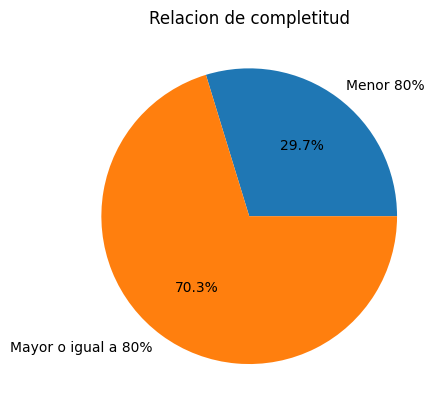

In [ ]:
etiquetas = 'Menor 80%', 'Mayor o igual a 80%'
datos = [min80.shape[0],max80.shape[0]]
titulo = 'Relacion de completitud'

fig, ax = plt.subplots()
ax.pie(datos, labels=etiquetas, autopct='%1.1f%%')
plt.title(titulo)
plt.show()

Se concluye que las columnas que no cumplen con una completitud <80%, correspondiente al 29,7% del total de datos, no son aptas para el análisis, por tanto se procede a eliminarlas.

In [ ]:
# Identificamos el tipo de dato de cada variable
for col in df.columns:
    print(f"Variable: {col}, Tipo de dato: {df[col].dtype}")

Variable: id, Tipo de dato: int64
Variable: member_id, Tipo de dato: int64
Variable: loan_amnt, Tipo de dato: float64
Variable: funded_amnt, Tipo de dato: float64
Variable: funded_amnt_inv, Tipo de dato: float64
Variable: term, Tipo de dato: object
Variable: int_rate, Tipo de dato: float64
Variable: installment, Tipo de dato: float64
Variable: grade, Tipo de dato: object
Variable: sub_grade, Tipo de dato: object
Variable: emp_title, Tipo de dato: object
Variable: emp_length, Tipo de dato: object
Variable: home_ownership, Tipo de dato: object
Variable: annual_inc, Tipo de dato: float64
Variable: verification_status, Tipo de dato: object
Variable: issue_d, Tipo de dato: object
Variable: loan_status, Tipo de dato: object
Variable: pymnt_plan, Tipo de dato: object
Variable: url, Tipo de dato: object
Variable: desc, Tipo de dato: object
Variable: purpose, Tipo de dato: object
Variable: title, Tipo de dato: object
Variable: zip_code, Tipo de dato: object
Variable: addr_state, Tipo de dato: o

Se ve que tenemos datos de numeros enteros, flotantes y objects

  Verificamos variables continuas, discretas y variable objetivo

> Recomendaciones: usa funciones como `.info`, `.head` y `.duplicated`.



## Parte 2
* Elimina los datos faltantes o duplicados con el método que sea más conveniente y justifica tu elección.

* Elimina las variables cuyo valor de completitud sea menor a 80; después, identifica y modifica aquellos valores atípicos (_outliers_).

In [ ]:
max80[max80['unico']==df.shape[0]]

,columna,tipo,total,faltantes,pct,unico
0,id,int64,887379,0,100.0,887379
1,member_id,int64,887379,0,100.0,887379
18,url,object,887379,0,100.0,887379


In [ ]:
max80[max80['unico']==1]

,columna,tipo,total,faltantes,pct,unico
51,policy_code,float64,887379,0,100.0,1


Observamos que en las columnas "Id" y "Member_id" tanto el total de los registros como su valor único son iguales, esto quiere decir que tienen un valor entero autonumerico. Pasa lo mismo en el campo de "url", ya que el valor unico tiene el mismo tamaño que el total de los registros, además es de tipo categórico.

In [ ]:
noanalisis = ['id','member_id', 'url', 'policy_code']

In [ ]:
df = df.drop(noanalisis,axis=1)

In [ ]:
# Procedemos a hacer análisis de duplicados
dup = df[df.duplicated()]
if dup.shape[0] == 0:
    print('No existen duplicados en el set de datos')
else:
    print(f'Existen {dup.shape[0]} duplicados en el set de datos')

No existen duplicados en el set de datos


In [ ]:
df.shape

(887379, 48)

In [ ]:
dataset.append(list(df.shape))

Vemos que ahora el dataset contiene 887.379 registros y 48 columnas.

**Observamos los tipos de datos**

In [ ]:
completitud = infoplus(df)
completitud.tail()

,columna,tipo,total,faltantes,pct,unico
9,emp_length,object,842554,44825,94.9486,12
8,emp_title,object,835917,51462,94.2007,299272
45,tot_coll_amt,float64,817103,70276,92.0805,10326
46,tot_cur_bal,float64,817103,70276,92.0805,327343
47,total_rev_hi_lim,float64,817103,70276,92.0805,21252


In [ ]:
tiponum = completitud[completitud['tipo'] == 'float64']
colnum = list(tiponum['columna'].values)

In [ ]:
tipoobj = completitud[completitud['tipo'] == 'object']
colobj = list(tipoobj['columna'].values)

In [ ]:
outliers = outlierIQR(df,colnum)

In [ ]:
outcol = list(outliers['features'][outliers['total_outliers'] > 0])

In [ ]:
print(f'***** Hay {len(outcol)} columnas que contienen valores anomalos')

***** Hay 29 columnas que contienen valores anomalos


**Procedemos a imputar**

In [ ]:
fnImputar(outcol,'median') #median

***** Imputacion finalizada, 29 columnas, criterio usado: median


In [ ]:
fnImputar(colobj,'most_frequent')

***** Imputacion finalizada, 19 columnas, criterio usado: most_frequent


Para la imputación se utilizaron dos métodos: Por mediana y moda.
Para las variables categóricas se utiliza la moda y para las variables numéricas la mediana. Esto para minimizar el sesgo, para conservar la distribución y en el caso de la mediana para tener un mejor manejo de outliers al ser mas robusta que la media al haber valores atípicos, con esto la imputación no se distorsiona por valores extremos.

In [ ]:
if df.isnull().values.any():
    print('***** Los datos NO estan completos')
else:
    print('***** Los datos estan completos')

***** Los datos estan completos


**Vemos los Outliers**

In [ ]:
outliers = outlierIQR(df,colnum)

In [ ]:
outliers.head(3)

,features,n_outliers_IQR,n_outliers_Percentil,n_outliers_Mean_Change,n_outliers_IQR_%,n_outliers_Percentil_%,n_outliers_Mean_Change_%,total_outliers,%_outliers,indices
0,loan_amnt,0,86204,26,0.0,9.71,0.00,26,0.00,"[39442, 38932, 38936, 42136, 39331, 39466, 422..."
1,funded_amnt,0,86107,26,0.0,9.70,0.00,26,0.00,"[39442, 38932, 38936, 42136, 39331, 39466, 422..."
2,funded_amnt_inv,0,84100,478,0.0,9.48,0.05,478,0.05,"[41422, 41423, 41424, 41425, 41426, 41427, 414..."


In [ ]:
outcol = list(outliers['features'][outliers['total_outliers'] > 0])

Total registros antes de eliminar Outliers: 887379
Total registros despues de eliminar Outliers: 560995




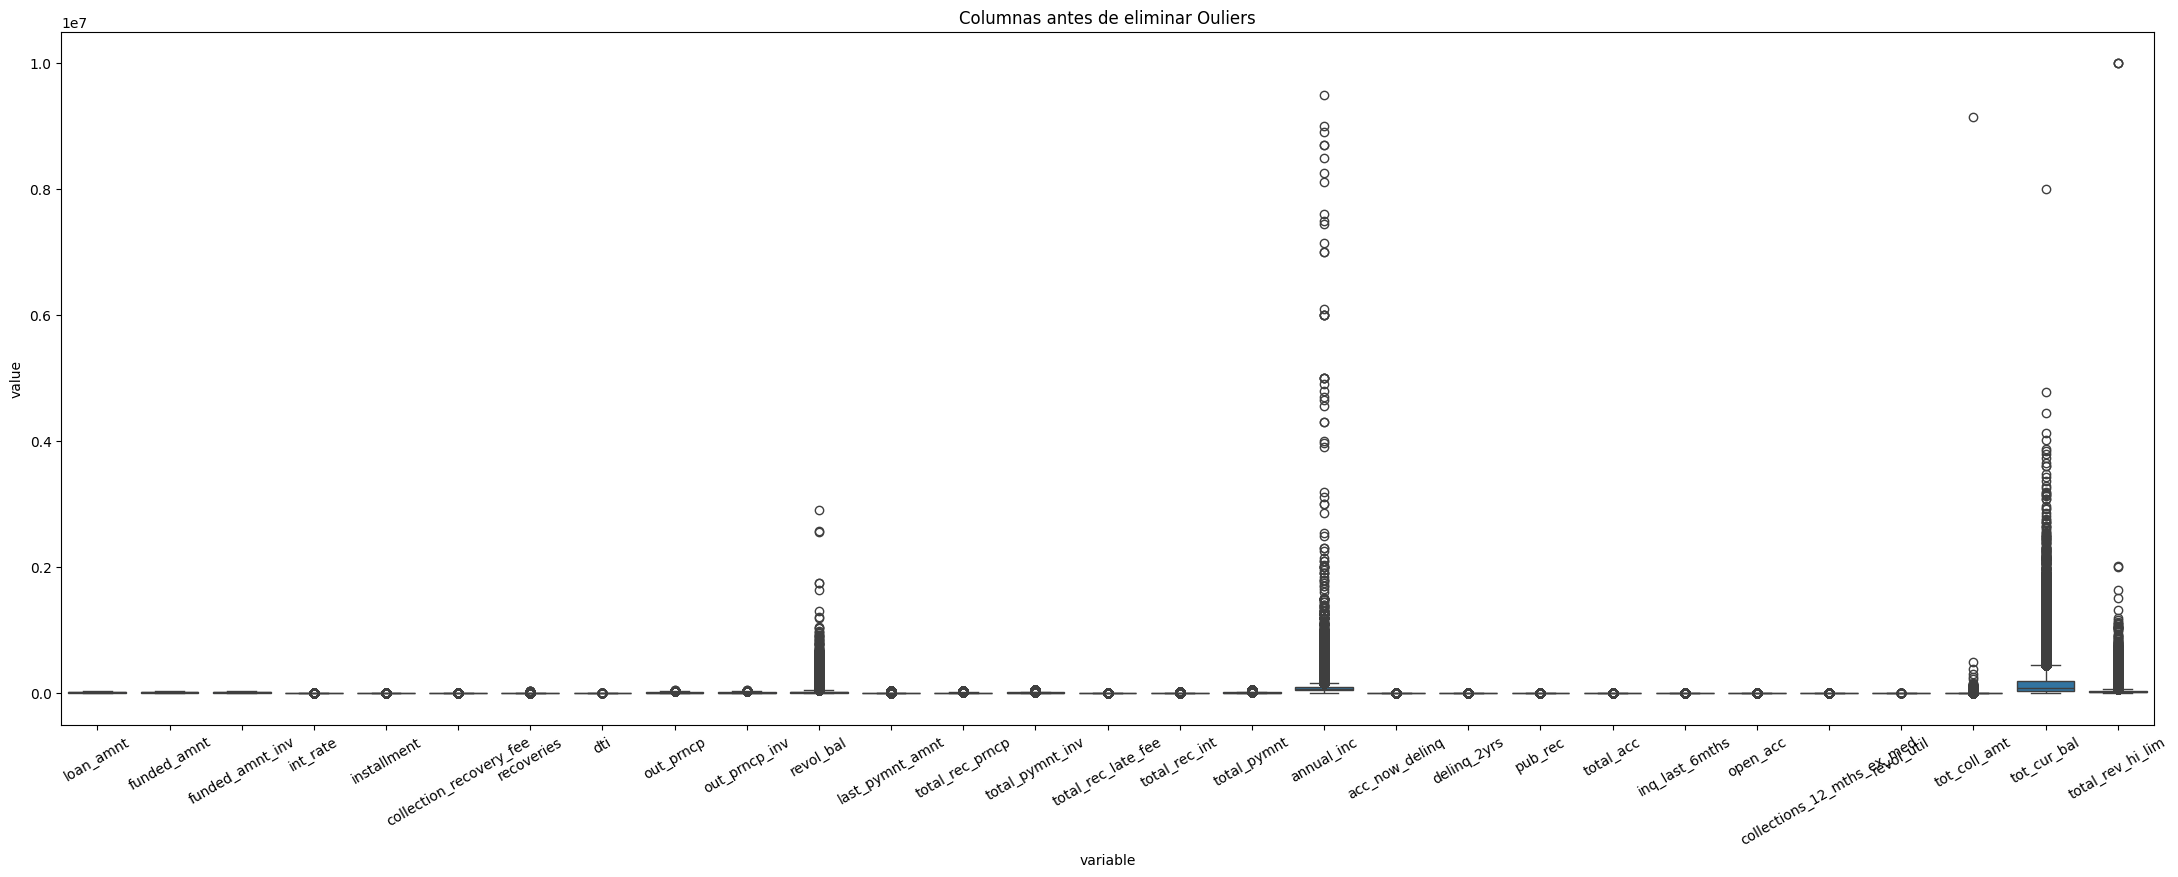

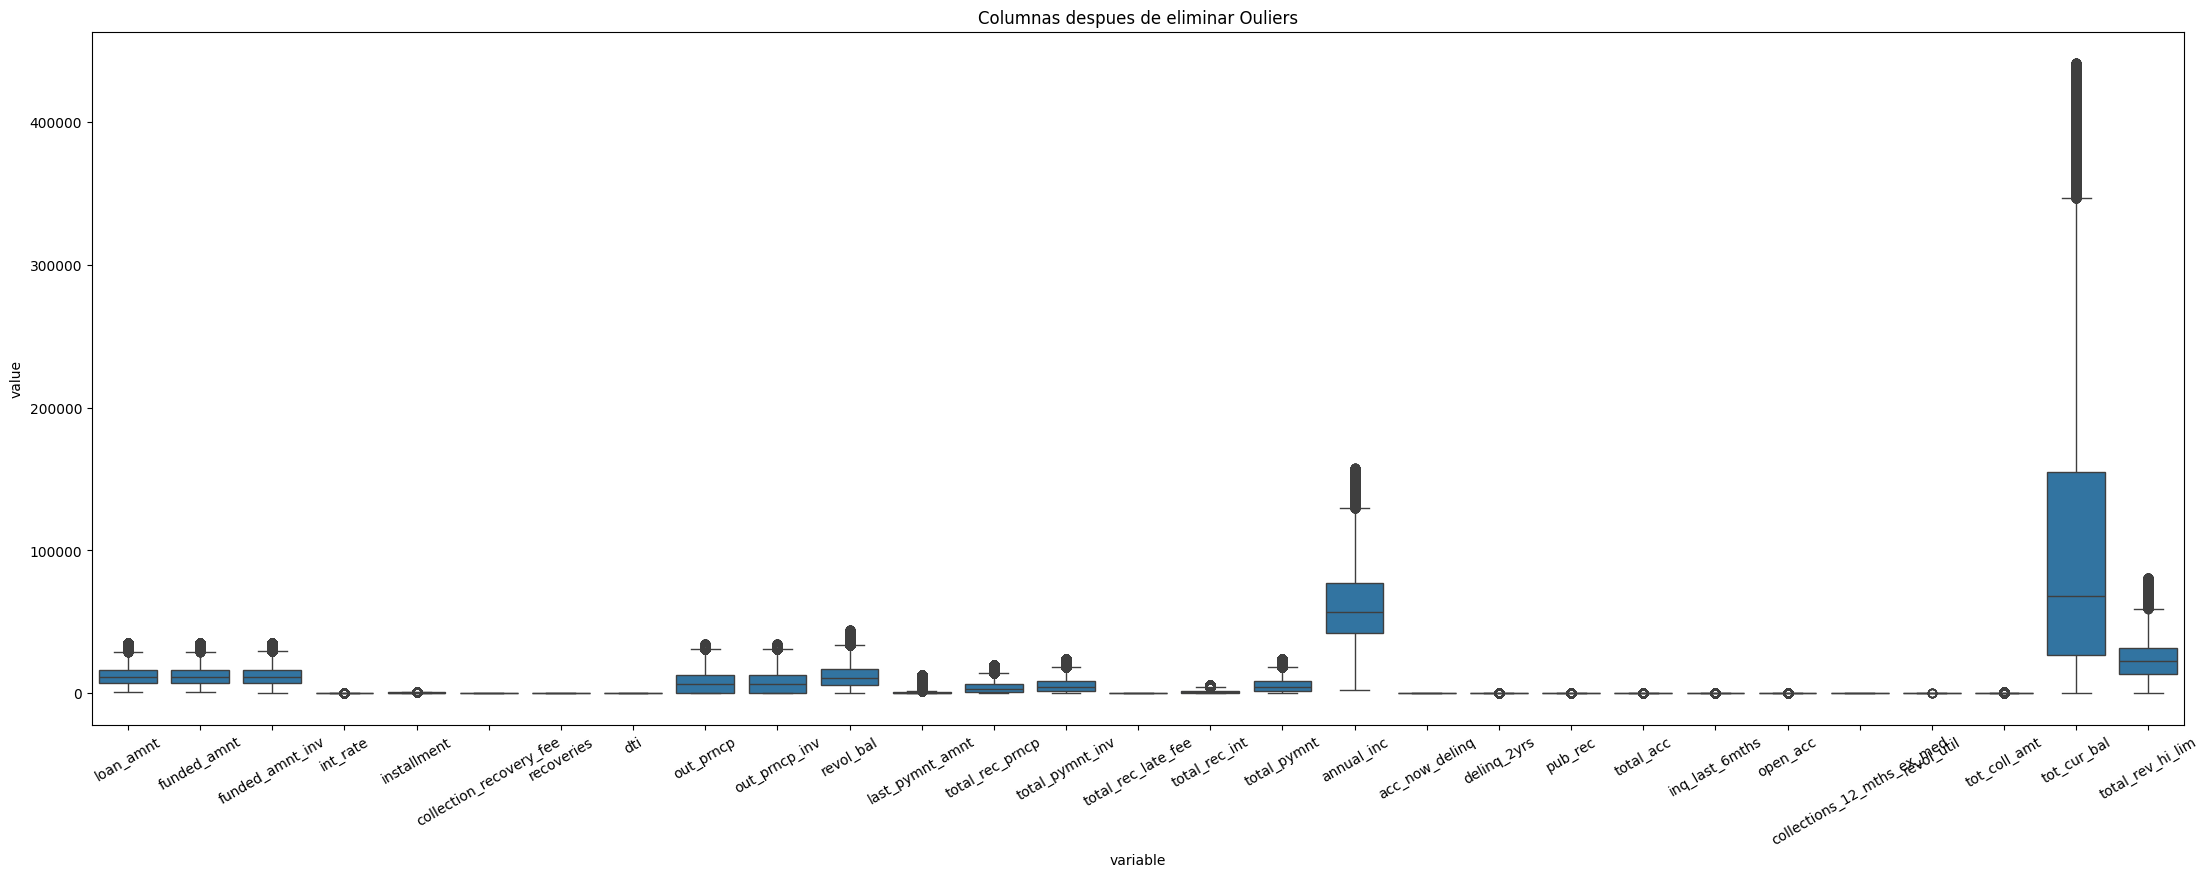

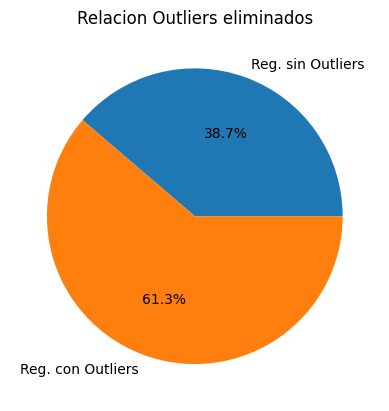

In [ ]:
dfo = eliminarOUTLIERS(outcol)

En el gráfico 1 observamos las columnas antes de eliminar los outliers y en el gráfico 2 las columnas luego de eliminar outliers. Se puede observar una reducción significativa de los puntos fuera de los bigotes, lo que se traduce en valores atípicos eliminados. Ahora las cajas y los bigotes representan distribuciones más compactas y menos afectadas por los valores extremos.

In [ ]:
dfo.shape

(560995, 48)

In [ ]:
dataset.append(list(dfo.shape))

In [ ]:
df = dfo.copy()

In [ ]:
info = infoplus(df)

In [ ]:
dfnum = df.select_dtypes(include = ['float64', 'int64'])

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'installment'}>],
       [<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinq_2yrs'}>,
        <Axes: title={'center': 'inq_last_6mths'}>,
        <Axes: title={'center': 'open_acc'}>],
       [<Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'out_prncp'}>],
       [<Axes: title={'center': 'out_prncp_inv'}>,
        <Axes: title={'center': 'total_pymnt'}>,
        <Axes: title={'center': 'total_pymnt_inv'}>,
        <Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: title={'ce

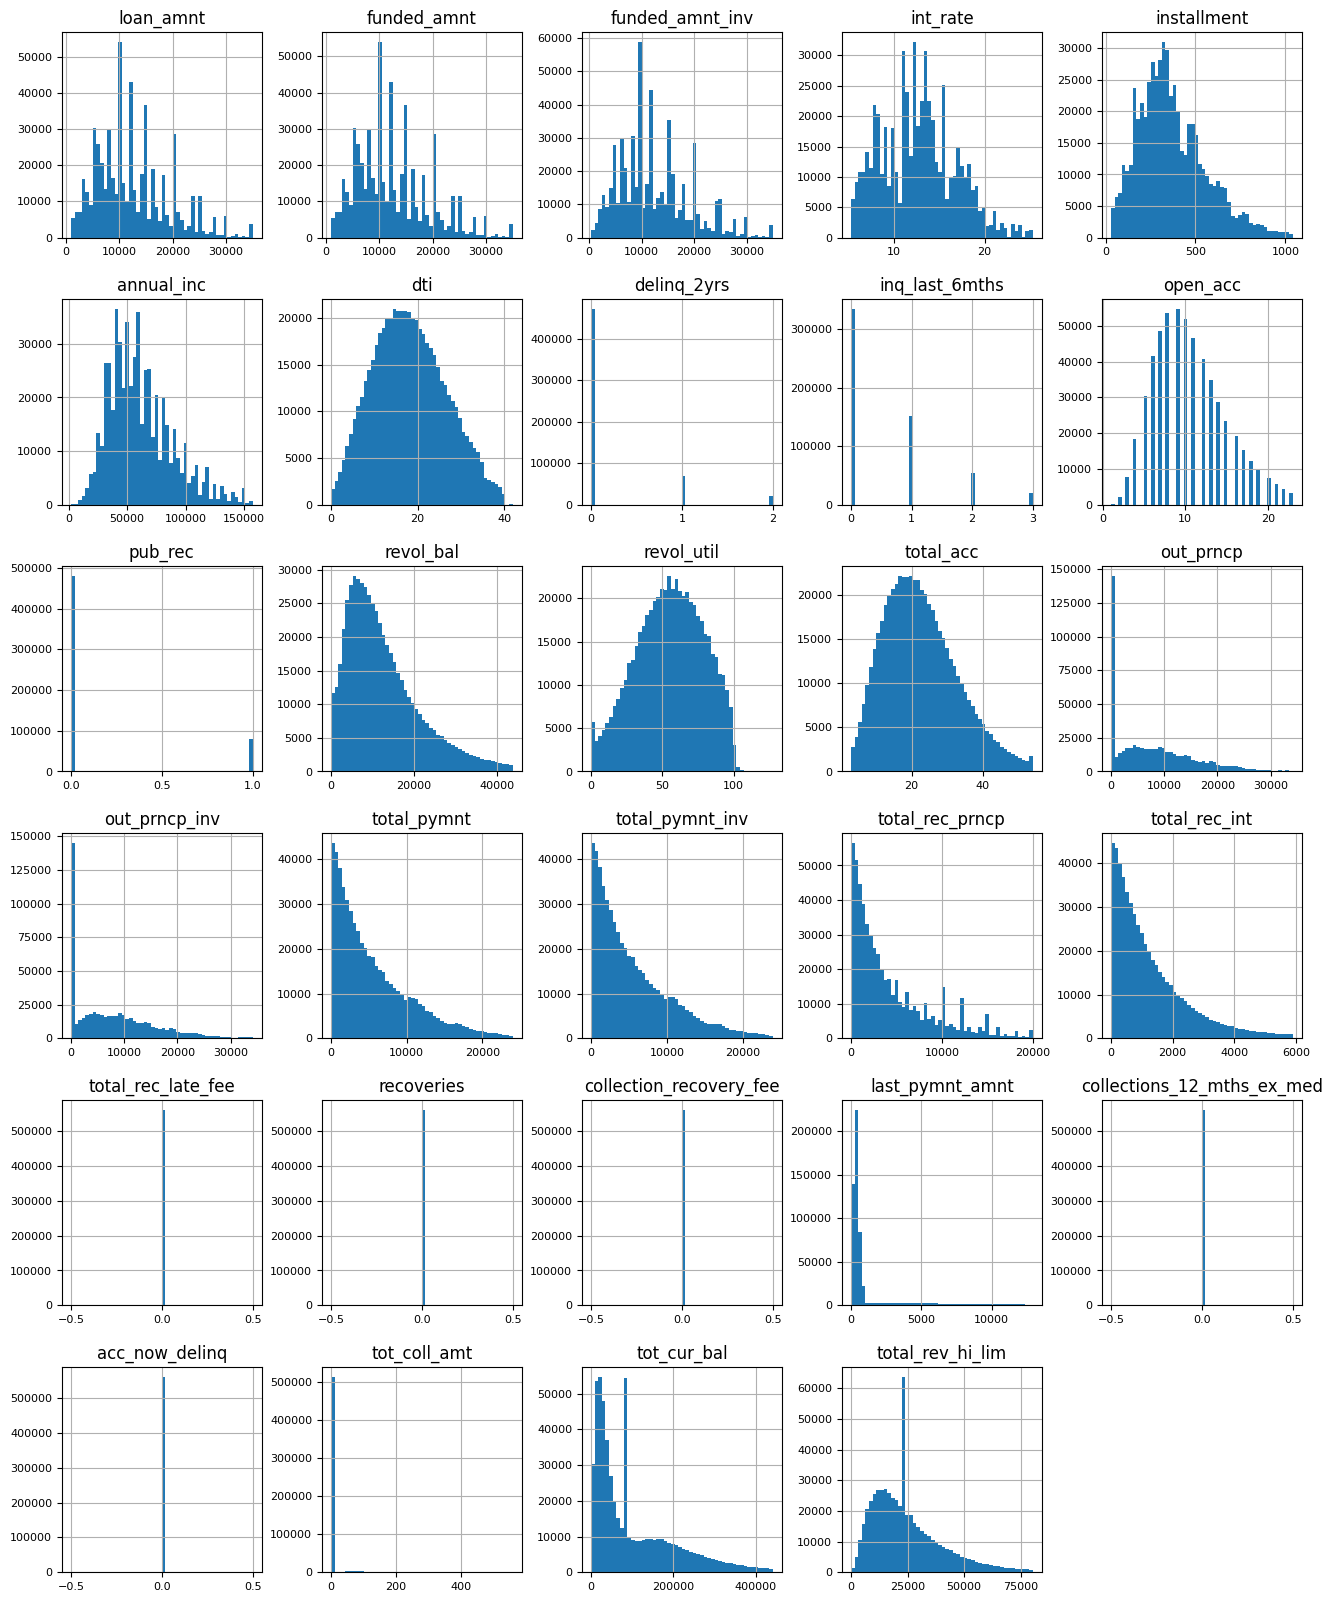

In [ ]:
dfnum.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
# Eliminamos columnas con datos únicos
colunico = info[info['unico']==1]
colunico = list(colunico['columna'].values)
colunico

['total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'acc_now_delinq']

In [ ]:
df = df.drop(colunico,axis=1)

In [ ]:
df.shape

(560995, 43)

In [ ]:
dataset.append(list(df.shape))

In [ ]:
# Histogramas
dfnum = df.select_dtypes(include = ['float64', 'int64'])

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'installment'}>],
       [<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinq_2yrs'}>,
        <Axes: title={'center': 'inq_last_6mths'}>,
        <Axes: title={'center': 'open_acc'}>],
       [<Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'out_prncp'}>],
       [<Axes: title={'center': 'out_prncp_inv'}>,
        <Axes: title={'center': 'total_pymnt'}>,
        <Axes: title={'center': 'total_pymnt_inv'}>,
        <Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: title={'ce

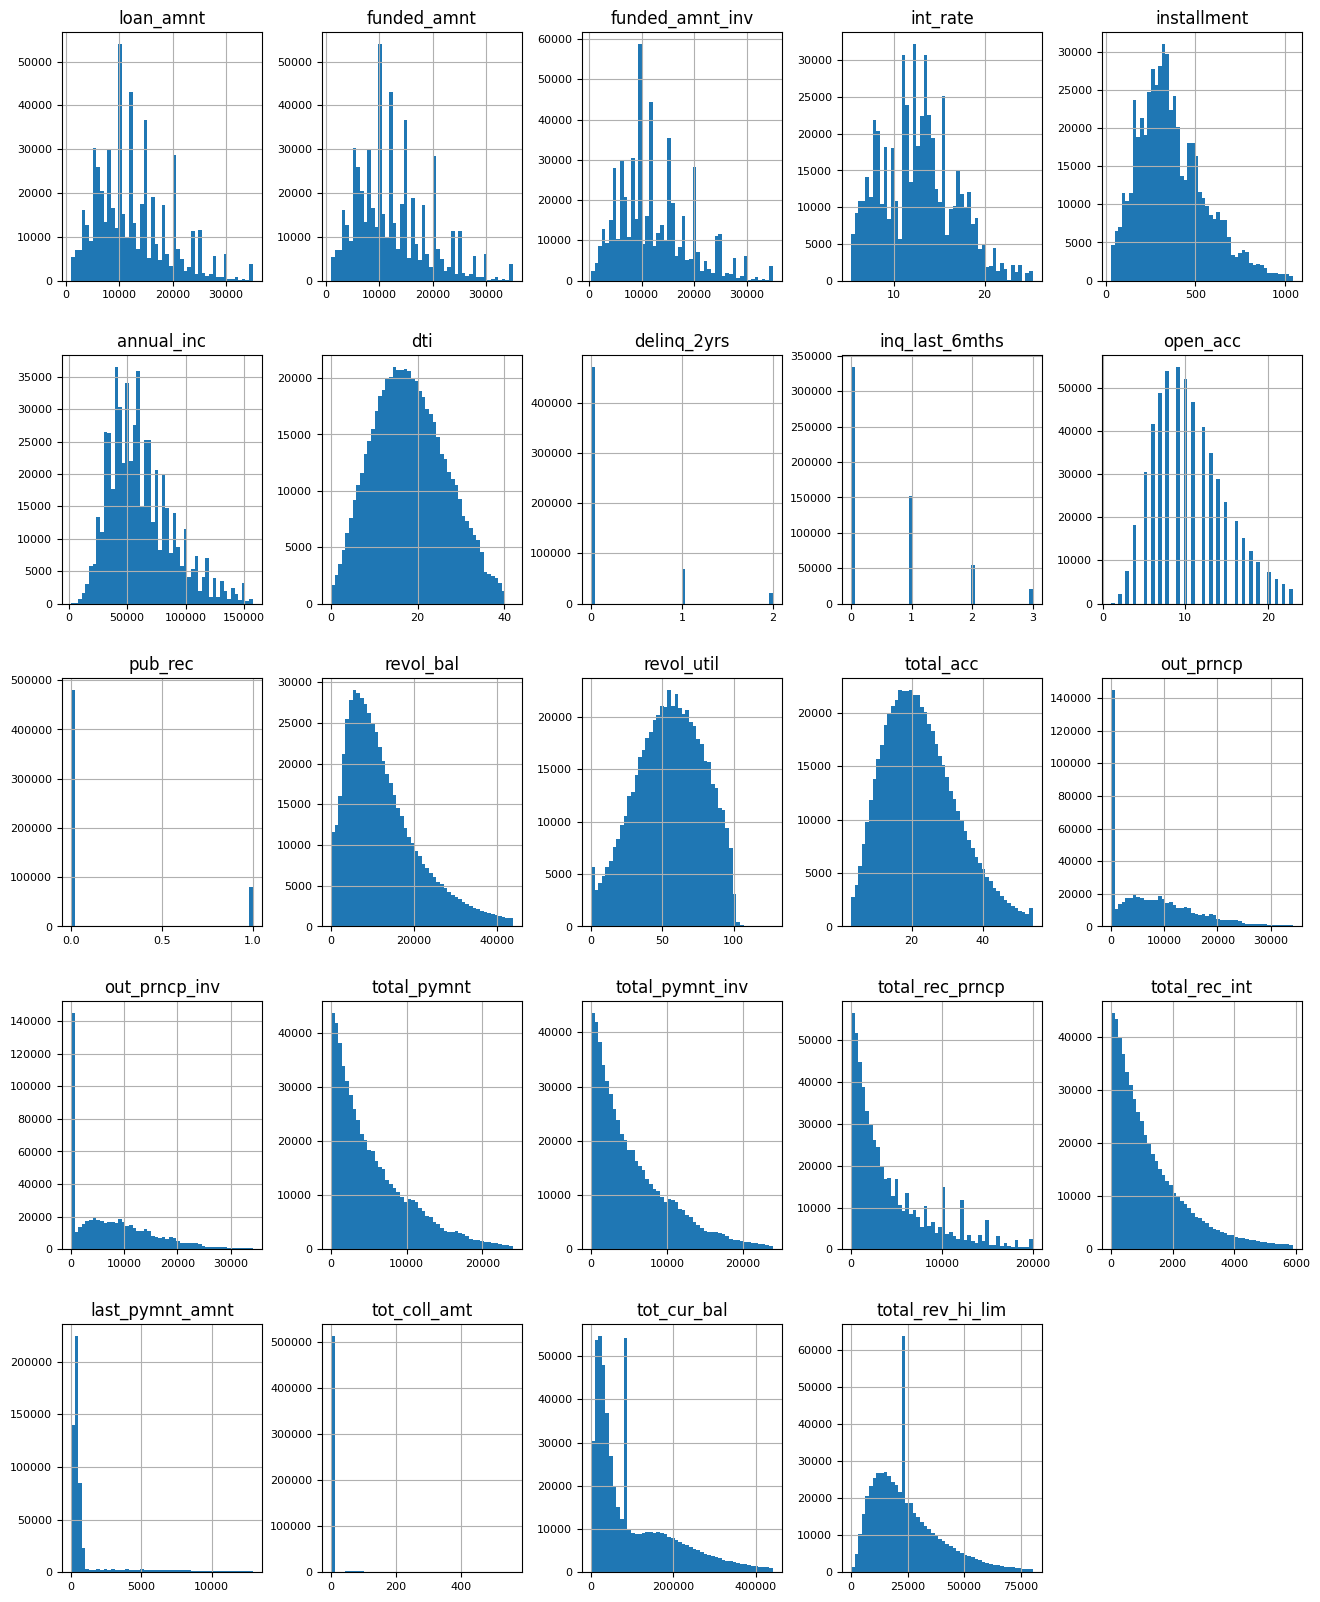

In [ ]:
dfnum.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

Procedemos a ver la correlación entre las variables y mapa de calor

In [ ]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,Jan-2015,171.62,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0
1,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.0,603.65,Jun-2014,649.91,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0


In [ ]:
#cor = df.corr().round(2)
cor = df.select_dtypes(include='number').corr().round(2)

<Axes: >

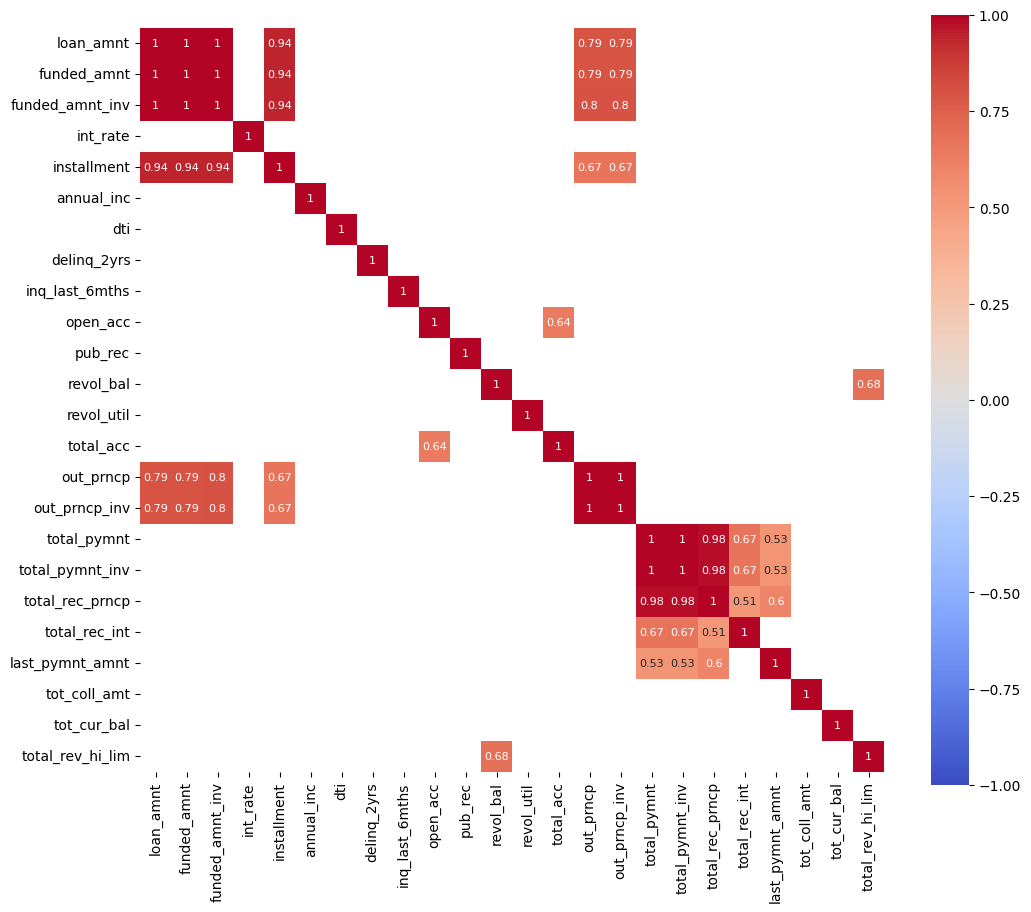

In [ ]:
f, ax = plt.subplots(figsize=(12, 10))
#corr = df.corr()
sns.heatmap(cor[(cor>=0.5) | (cor<=-0.5)],
            cmap='coolwarm',
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size':8},
            square=True,
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values)

Podemos observar dos variables que tienen una alta correlación:
Primero está la variable loan_amnt que tenemos una distribución normal para este grupo, por lo que se define como variable objetivo, además de justifica por la relacion que tenemos con los datos del dataset.
Segundo esta la variable total_pymnt, observamos que para este grupo la distribución no es normal, sino que es exponencial.

In [ ]:
# Correlacion con la variable objetivo
cor_target = abs(cor['loan_amnt'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

,loan_amnt
loan_amnt,1.00
funded_amnt,1.00
funded_amnt_inv,1.00
installment,0.94
out_prncp,0.79
out_prncp_inv,0.79


In [ ]:
tiponum = info[info['tipo'] == 'float64']
colnum = list(tiponum['columna'].values)

In [ ]:
tipoobj = info[info['tipo'] == 'object']
colobj = list(tipoobj['columna'].values)

In [ ]:
# Cambiamos los nombres de variables
tgt=['loan_amnt']

df=rename_cols(df,tgt,"tgt_")
df=rename_cols(df,colobj,"v_")
df=rename_cols(df,colnum,"c_")

In [ ]:
df.head(3)

,tgt_loan_amnt,c_funded_amnt,c_funded_amnt_inv,v_term,c_int_rate,c_installment,v_grade,v_sub_grade,v_emp_title,v_emp_length,v_home_ownership,c_annual_inc,v_verification_status,v_issue_d,v_loan_status,v_pymnt_plan,v_purpose,v_title,v_zip_code,v_addr_state,c_dti,c_delinq_2yrs,v_earliest_cr_line,c_inq_last_6mths,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,v_initial_list_status,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,v_last_pymnt_d,c_last_pymnt_amnt,v_last_credit_pull_d,v_application_type,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,Jan-2015,171.62,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0
1,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.0,603.65,Jun-2014,649.91,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0
2,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.1,1009.07,Jan-2016,67.79,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0


In [ ]:
# Identificamos las variables correlacionadas con la variable objetivo
colcor = ['tgt_loan_amnt','c_funded_amnt','c_funded_amnt_inv','c_installment','c_out_prncp','c_out_prncp_inv']

## Parte 3
Usa un transformador o los transformadores necesarios y justifica tu elección.

In [ ]:
dfcor = df[colcor].copy()

In [ ]:
escalador = StandardScaler()
dfcor[colcor] = escalador.fit_transform(dfcor[colcor])

In [ ]:
dfcor.head()

,tgt_loan_amnt,c_funded_amnt,c_funded_amnt_inv,c_installment,c_out_prncp,c_out_prncp_inv
0,-1.099540,-1.098713,-1.097285,-1.106943,-1.050671,-1.050676
1,-1.481571,-1.480936,-1.475370,-1.524085,-1.050671,-1.050676
2,-1.393410,-1.392731,-1.387273,-1.611933,-0.948005,-0.947968
3,-1.099540,-1.098713,-1.093615,-1.140988,-1.050671,-1.050676
4,-0.805670,-0.804696,-0.799956,-1.068650,-0.797767,-0.797669


In [ ]:
dfnum = df.select_dtypes(include = ['float64', 'int64'])

array([[<Axes: title={'center': 'tgt_loan_amnt'}>,
        <Axes: title={'center': 'c_funded_amnt'}>],
       [<Axes: title={'center': 'c_funded_amnt_inv'}>,
        <Axes: title={'center': 'c_installment'}>],
       [<Axes: title={'center': 'c_out_prncp'}>,
        <Axes: title={'center': 'c_out_prncp_inv'}>]], dtype=object)

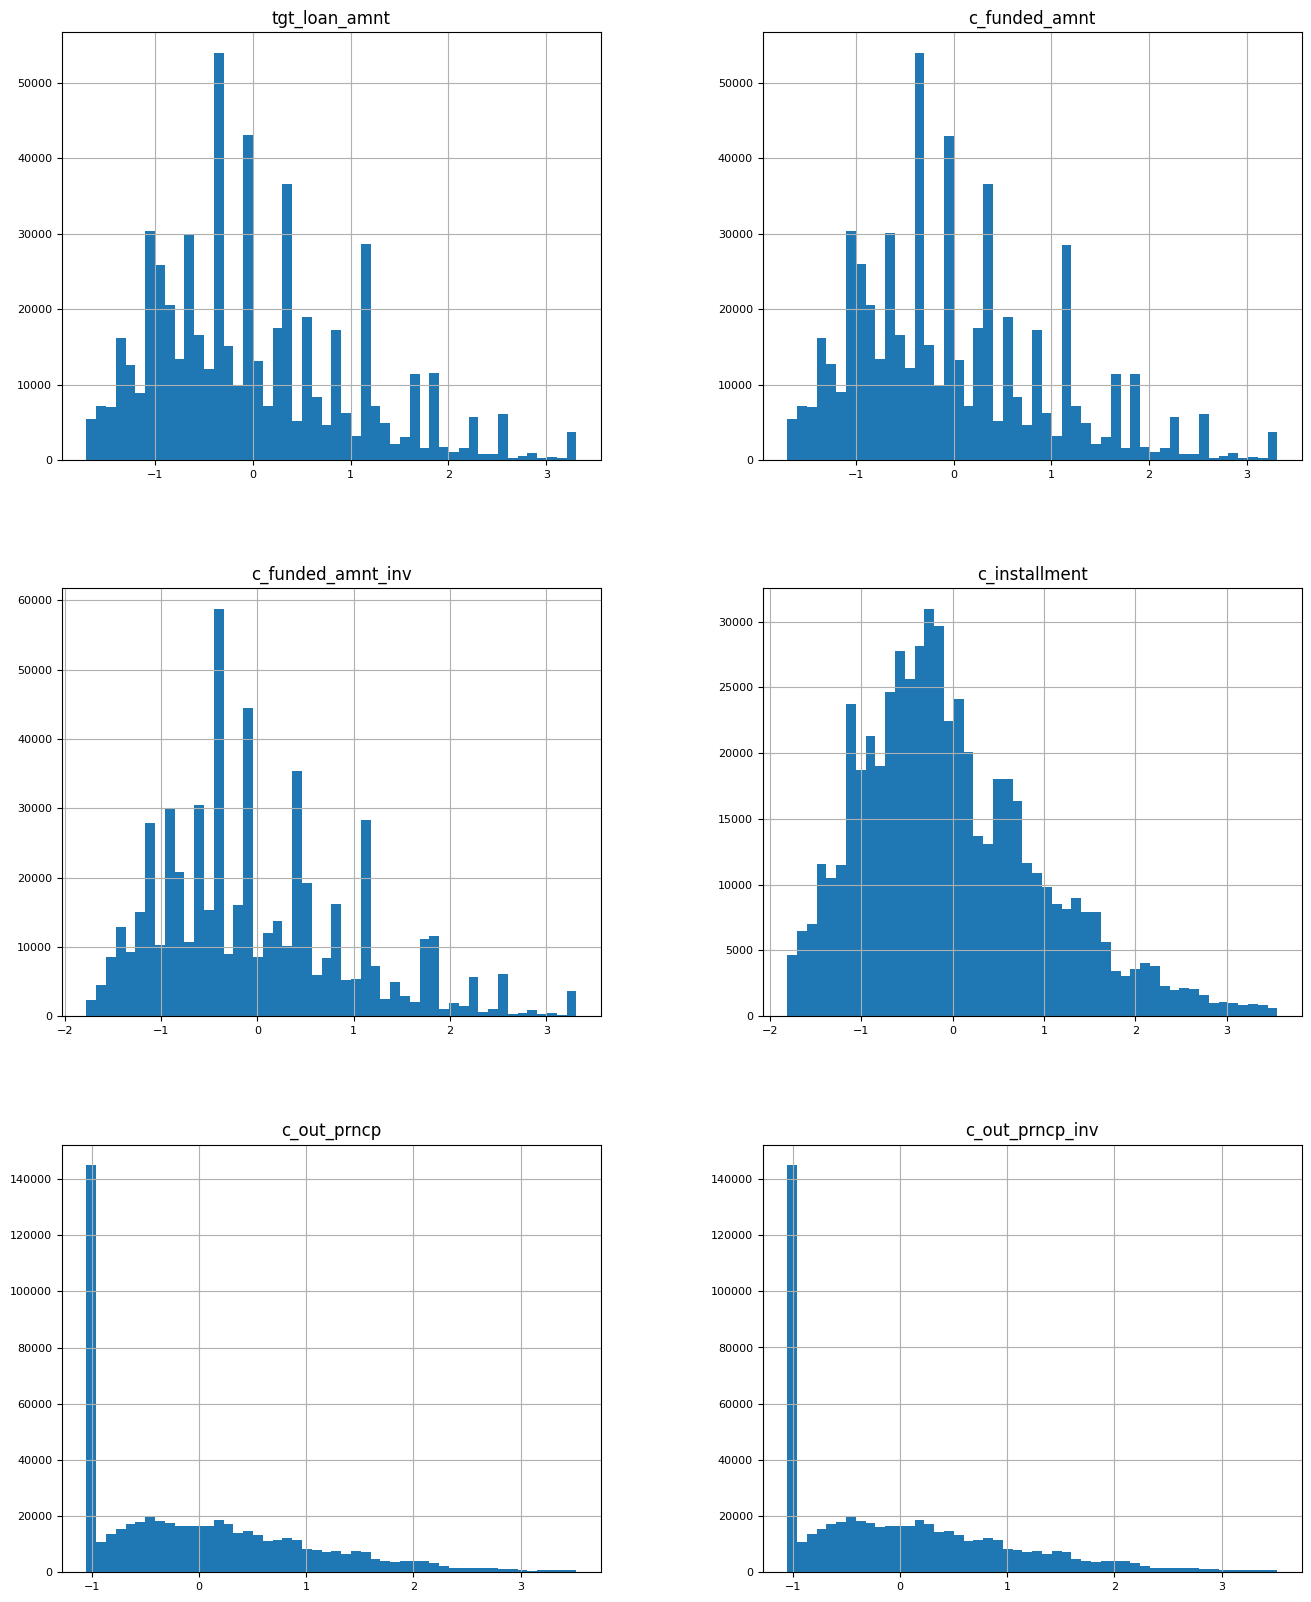

In [ ]:
dfcor.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
corss = dfcor.corr().round(2)

<Axes: >

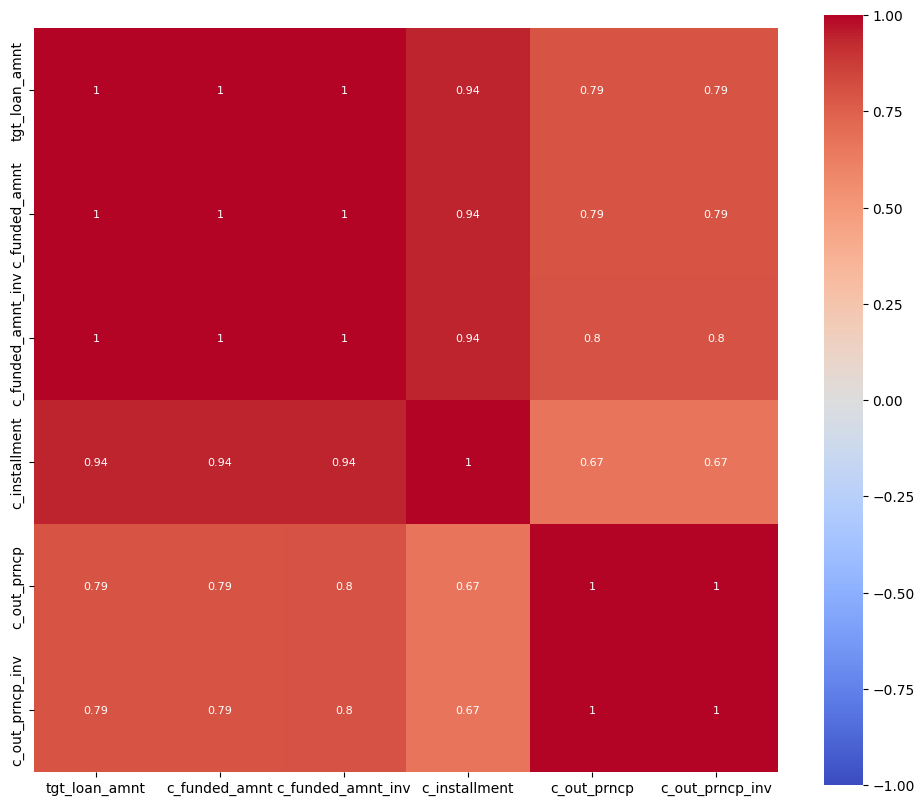

In [ ]:
# Observamos nuevamente la correlación
f, ax = plt.subplots(figsize=(12, 10))
#corr = df.corr()
sns.heatmap(corss[(corss>=0.5) | (corss<=-0.5)],
            cmap='coolwarm',
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size':8},
            square=True,
            xticklabels=dfcor.columns.values,
            yticklabels=dfcor.columns.values)

Procedemos a estandarizar variables de texto utilizando dummies, label encoder y one hot encoder

In [ ]:
df2 = df.copy()

In [ ]:
df= df2.copy()

In [ ]:
df.head()

,tgt_loan_amnt,c_funded_amnt,c_funded_amnt_inv,v_term,c_int_rate,c_installment,v_grade,v_sub_grade,v_emp_title,v_emp_length,v_home_ownership,c_annual_inc,v_verification_status,v_issue_d,v_loan_status,v_pymnt_plan,v_purpose,v_title,v_zip_code,v_addr_state,c_dti,c_delinq_2yrs,v_earliest_cr_line,c_inq_last_6mths,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,v_initial_list_status,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,v_last_pymnt_d,c_last_pymnt_amnt,v_last_credit_pull_d,v_application_type,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,Jan-2015,171.62,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0
1,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,Jun-2014,649.91,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0
2,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,Jan-2016,67.79,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0
3,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,Jan-2015,161.03,Sep-2015,INDIVIDUAL,0.0,80559.0,23700.0
4,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-2011,Current,n,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,Jan-2016,170.08,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0


In [ ]:
info = infoplus(df)
info = info[info['tipo']=='object']
info

,columna,tipo,total,faltantes,pct,unico
3,v_term,object,560995,0,100.0,2
6,v_grade,object,560995,0,100.0,7
7,v_sub_grade,object,560995,0,100.0,35
8,v_emp_title,object,560995,0,100.0,202112
9,v_emp_length,object,560995,0,100.0,11
10,v_home_ownership,object,560995,0,100.0,6
12,v_verification_status,object,560995,0,100.0,3
13,v_issue_d,object,560995,0,100.0,103
14,v_loan_status,object,560995,0,100.0,10
15,v_pymnt_plan,object,560995,0,100.0,2


In [ ]:
df['v_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
# Usamos dummies
prefijo = 'ownshp'

In [ ]:
df = pd.get_dummies(data=df, columns=['v_home_ownership'], prefix=prefijo)
colcat = list(df.filter(like=prefijo).columns)
colcat

['ownshp_ANY',
 'ownshp_MORTGAGE',
 'ownshp_NONE',
 'ownshp_OTHER',
 'ownshp_OWN',
 'ownshp_RENT']

In [ ]:
df.head()

,tgt_loan_amnt,c_funded_amnt,c_funded_amnt_inv,v_term,c_int_rate,c_installment,v_grade,v_sub_grade,v_emp_title,v_emp_length,c_annual_inc,v_verification_status,v_issue_d,v_loan_status,v_pymnt_plan,v_purpose,v_title,v_zip_code,v_addr_state,c_dti,c_delinq_2yrs,v_earliest_cr_line,c_inq_last_6mths,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,v_initial_list_status,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,v_last_pymnt_d,c_last_pymnt_amnt,v_last_credit_pull_d,v_application_type,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim,ownshp_ANY,ownshp_MORTGAGE,ownshp_NONE,ownshp_OTHER,ownshp_OWN,ownshp_RENT
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,Jan-2015,171.62,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0,False,False,False,False,False,True
1,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,Jun-2014,649.91,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0,False,False,False,False,False,True
2,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,Jan-2016,67.79,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0,False,False,False,False,False,True
3,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,36000.0,Source Verified,Dec-2011,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,Jan-2015,161.03,Sep-2015,INDIVIDUAL,0.0,80559.0,23700.0,False,False,False,False,False,True
4,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,47004.0,Not Verified,Dec-2011,Current,n,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,Jan-2016,170.08,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0,False,False,False,False,False,True


In [ ]:
# Usamos Label Encoder
df['v_grade'].unique()

array(['B', 'C', 'A', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
transformador = LabelEncoder()

In [ ]:
df['v_grade'] = transformador.fit_transform(df['v_grade'])

In [ ]:
df.head()

,tgt_loan_amnt,c_funded_amnt,c_funded_amnt_inv,v_term,c_int_rate,c_installment,v_grade,v_sub_grade,v_emp_title,v_emp_length,c_annual_inc,v_verification_status,v_issue_d,v_loan_status,v_pymnt_plan,v_purpose,v_title,v_zip_code,v_addr_state,c_dti,c_delinq_2yrs,v_earliest_cr_line,c_inq_last_6mths,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,v_initial_list_status,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,v_last_pymnt_d,c_last_pymnt_amnt,v_last_credit_pull_d,v_application_type,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim,ownshp_ANY,ownshp_MORTGAGE,ownshp_NONE,ownshp_OTHER,ownshp_OWN,ownshp_RENT
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,1,B2,Teacher,10+ years,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,Jan-2015,171.62,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0,False,False,False,False,False,True
1,2400.0,2400.0,2400.0,36 months,15.96,84.33,2,C5,Teacher,10+ years,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,Jun-2014,649.91,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0,False,False,False,False,False,True
2,3000.0,3000.0,3000.0,60 months,12.69,67.79,1,B5,University Medical Group,1 year,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,Jan-2016,67.79,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0,False,False,False,False,False,True
3,5000.0,5000.0,5000.0,36 months,7.90,156.46,0,A4,Veolia Transportaton,3 years,36000.0,Source Verified,Dec-2011,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,Jan-2015,161.03,Sep-2015,INDIVIDUAL,0.0,80559.0,23700.0,False,False,False,False,False,True
4,7000.0,7000.0,7000.0,60 months,15.96,170.08,2,C5,Southern Star Photography,8 years,47004.0,Not Verified,Dec-2011,Current,n,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,Jan-2016,170.08,Jan-2016,INDIVIDUAL,0.0,80559.0,23700.0,False,False,False,False,False,True


In [ ]:
# Usando One Hot Encoder
df['v_term'].unique()
columnas = list(df['v_term'].unique())
columnas

[' 36 months', ' 60 months']

In [ ]:
transformador = OneHotEncoder()

In [ ]:
enc_df = pd.DataFrame(transformador.fit_transform(df[['v_term']]).toarray(), columns=columnas)

In [ ]:
enc_df

,36 months,60 months
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
560990,1.0,0.0
560991,1.0,0.0
560992,1.0,0.0
560993,0.0,1.0


## Parte 4

Selecciona la mejor técnica para reducir las dimensiones y justifica por qué debe reducirse. Se recomienda indicar el número de dimensiones óptimo.

> Recuerda incluir en tu análisis los gráficos adecuados para comunicar lo que deseas expresar. Para favorecer tu entendimiento del programa, se sugiere el uso de comentarios (#) en cada bloque de código.



In [ ]:
# Utilizamos PCA
df3 = df.copy()

In [ ]:
# Nos centramos en las variables que tienen una fuerte correlación con la variable objetivo
colpca = ['c_funded_amnt','c_funded_amnt_inv','c_installment','c_out_prncp','c_out_prncp_inv']

In [ ]:
dfcor[colpca].head()

,c_funded_amnt,c_funded_amnt_inv,c_installment,c_out_prncp,c_out_prncp_inv
0,-1.098713,-1.097285,-1.106943,-1.050671,-1.050676
1,-1.480936,-1.475370,-1.524085,-1.050671,-1.050676
2,-1.392731,-1.387273,-1.611933,-0.948005,-0.947968
3,-1.098713,-1.093615,-1.140988,-1.050671,-1.050676
4,-0.804696,-0.799956,-1.068650,-0.797767,-0.797669


In [ ]:
pca = PCA()

In [ ]:
pca.fit_transform(dfcor[colpca])

array([[-2.41653934e+00,  1.85166919e-02, -6.59850458e-02,
        -6.12591822e-04, -1.14662434e-05],
       [-2.95078597e+00,  4.38610500e-01, -3.21046773e-02,
        -2.43230485e-03, -8.07918011e-06],
       [-2.81745199e+00,  5.45776361e-01, -1.54914654e-01,
        -6.84422255e-04,  7.83008282e-06],
       ...,
       [ 3.61705963e+00, -7.47798215e-01,  4.23473862e-01,
        -7.75115478e-03,  6.83144969e-04],
       [ 3.32598366e-01,  5.86340999e-01, -1.91574040e-01,
         1.56257317e-03,  4.04691865e-04],
       [ 2.43542756e+00, -4.80062322e-01,  3.45209717e-01,
        -6.64885654e-03,  5.68781680e-04]])

In [ ]:
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_.round(3)*100)

Varianza explicada por cada componente:
[87.3 11.4  1.2  0.   0. ]


In [ ]:
sum(pca.explained_variance_ratio_)

np.float64(1.0)

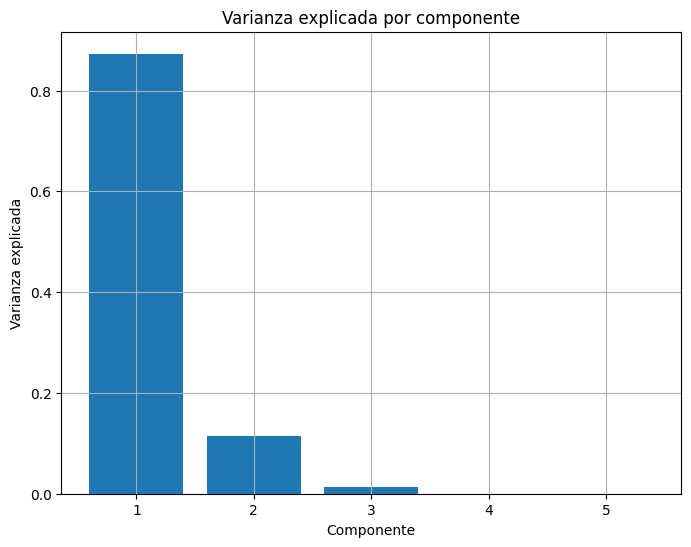

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por componente')
plt.grid(True)
plt.show()

Observamos que se explica para el primer componente el 87% de la varianza anaizada en los datos, en la segunda el 11% y en los restantes se alcanzó un 1.2%

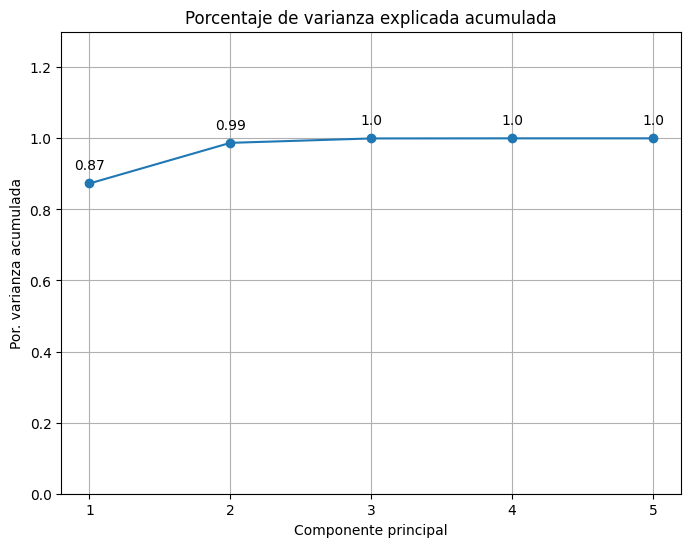

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(
    np.arange(len(colpca)) + 1,
    np.cumsum(pca.explained_variance_ratio_),
    marker = 'o'
)

for x, y in zip(np.arange(len(colpca)) + 1, np.cumsum(pca.explained_variance_ratio_)):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.3)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.grid(True);

Aca podemos observar que se explica el 87% de la varianza para el primer componente y para el segundo agrega un 11%. Los restantes explican porcentajes mucho mas bajos. Podemos visualizar que el codo está alrededor del segundo componente, lo que sugiere que utilizar los dos primeros resulta suficiente para representar la mayor parte de la variabilidad presente en los datos originales, lo que logra reducir la dimensionalidad sin una pérdidad significativa de información. Esto se traduce en que el uso de dos componentes principales captura aproximadamente el 98% de la varianza total